In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split

from scipy import stats

In [2]:
khan_data = pd.read_csv('./data/return_user.csv')

In [3]:
khan_data = khan_data.drop(['Unnamed: 0'], axis =1)

In [4]:
khan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31481 entries, 0 to 31480
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   timestamp             31481 non-null  object
 1   user_id               31481 non-null  int64 
 2   session_id            31481 non-null  int64 
 3   country               31481 non-null  object
 4   language              31481 non-null  object
 5   user_registered_flag  31481 non-null  bool  
 6   device_type           31481 non-null  object
 7   KA_app_flag           31481 non-null  bool  
 8   OS                    31481 non-null  object
 9   URI                   26149 non-null  object
 10  conversion            31481 non-null  object
 11  returned_user         31481 non-null  int64 
 12  returner              31481 non-null  object
dtypes: bool(2), int64(3), object(8)
memory usage: 2.7+ MB


In [34]:
khan_data['returner'].describe()

count     31481
unique        2
top         Yes
freq      21790
Name: returner, dtype: object

In [27]:
khan_data.head(10)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,returned_user,returner
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,1,Yes
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,1,Yes
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,1,Yes
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,1,Yes
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,1,Yes
5,2016-02-18 18:07:06.233494 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math/task/63250174127...",pageview,1,Yes
6,2016-02-18 18:08:23.21072 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,1,Yes
7,2016-02-18 18:08:35.05428 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-fifth-grade-math""",pageview,1,Yes
8,2016-02-18 18:08:41.48111 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math""",pageview,1,Yes
9,2016-02-18 18:08:46.90117 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math/task/60413444865...",pageview,1,Yes


## Chi-square test 

Using a Chi-square test to decide whether there is a relationiship between two categorical variables
H₀: The two categorical variables have no relationship
H₁: There is a relationship between two categorical variables



In [41]:
# Generate Dummy varibles for categorical variables -> shouldn't be needed as that is why I make a crosstab
from scipy.stats import chi2_contingency 
import numpy as np

In [42]:
#Create contigency table 
data_crosstab = pd.crosstab(khan_data['returner'], khan_data['language'], margins=True, )

In [43]:
#Set Significance level
alpha = 0.05

In [38]:
#Calculation of Chisquare for language
chi_square = 0 
rows = khan_data['returner'].unique()
columns = khan_data['language'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

In [39]:
#Printing the results with the p-value approach 
print("Appraoch 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

print("\n--------------------------------------------------------------------------------------")

print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Appraoch 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 303.42106797957115  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 303.42106797957115  and critical value is: 18.307038053275146
Null Hypothesis is rejected.


## Simpiler chi2 Test

### Being a returner correlated with language - Significant

In [74]:
khan_data['language'].describe()

count     31481
unique       11
top          en
freq      29697
Name: language, dtype: object

In [63]:
chisqt = pd.crosstab(khan_data.returner, khan_data.language, margins=True)
print(chisqt)

language  da  de     en   es  fr   nb  pl   pt  th  tr  zh-HANS    All
returner                                                              
No        19   1   9061  411  11    8  14  136   4  24        2   9691
Yes        0   0  20636  493   0  153  24  484   0   0        0  21790
All       19   1  29697  904  11  161  38  620   4  24        2  31481


In [82]:
from scipy.stats import chi2_contingency 
import numpy as np
value = np.array([chisqt.iloc[0][0:11].values,
                  chisqt.iloc[1][0:11].values])
print(chi2_contingency(value)[0:3])

(303.42106797957115, 2.93988057246509e-59, 10)


The p-value is 0.0, 303.42 is the statistical value with 4 degrees of freedom, we are able to reject the null hypothesis, thus, language and being a returner is correlated

### Being a returner correlated with country - Significant

In [83]:
khan_data['country'].describe()

count     31481
unique       77
top          US
freq      21973
Name: country, dtype: object

In [100]:
khan_data['country'].value_counts()

US    21973
CA     1842
IE     1049
GB      649
BR      617
      ...  
CI        2
GR        2
AM        1
MA        1
DO        1
Name: country, Length: 77, dtype: int64

In [54]:
chisqt1 = pd.crosstab(khan_data.returner, khan_data.country, margins=True)
print(chisqt1)

country   AE  AM  AR  AT   AU  BD  BE   BR  BS  BY  ...  TR  TT  TW  UA  \
returner                                            ...                   
No        39   1   2   4  257   2  19  156   5  12  ...  20   9  14  11   
Yes       21   0   0   2  350  38   0  461   0   0  ...  15  13   0  16   
All       60   1   2   6  607  40  19  617   5  12  ...  35  22  14  27   

country      US  VE  VN   ZA  ZM    All  
returner                                 
No         7212   7   9   45  16   9691  
Yes       14761   0   0  247   0  21790  
All       21973   7   9  292  16  31481  

[3 rows x 78 columns]


In [84]:
value = np.array([chisqt1.iloc[0][0:78].values,
                  chisqt1.iloc[1][0:78].values])
print(chi2_contingency(value)[0:3])

(2794.7876150166785, 0.0, 77)


The p-value is 0.00, 2794.79 is the statistical value with 4 degrees of freedom, we are able to reject the null hypothesis, thus, country of orgin and being a returner is correlated

### Being a returner correlated with Operating System (OS)

In [85]:
khan_data['OS'].describe()

count       31481
unique         10
top       Windows
freq        17124
Name: OS, dtype: object

In [55]:
chisqt2 = pd.crosstab(khan_data.returner, khan_data.OS, margins=True)
print(chisqt2)

OS        Android  BlackBerry OS  Chrome OS  Linux  Mac OS X  Other  Ubuntu  \
returner                                                                      
No            449              3       1360     98      1795      7      27   
Yes          1055              0       2379     82      3710      0     412   
All          1504              3       3739    180      5505      7     439   

OS        Windows  Windows Phone   iOS    All  
returner                                       
No           5008              0   944   9691  
Yes         12116             14  2022  21790  
All         17124             14  2966  31481  


In [86]:
value = np.array([chisqt2.iloc[0][0:11].values,
                  chisqt2.iloc[1][0:11].values])
print(chi2_contingency(value)[0:3])

(285.58133175648203, 1.7283849214667232e-55, 10)


The p-value is 1.73, 285.58 is the statistical value with 4 degrees of freedom, we are unable to reject the null hypothesis, thus, Operating System(OS) and being a returner is not correlated

### Being a returner correlated with using Khan Academy App

In [57]:
chisqt3 = pd.crosstab(khan_data.returner, khan_data.KA_app_flag, margins=True)
print(chisqt3)

KA_app_flag  False  True    All
returner                       
No            9498   193   9691
Yes          21387   403  21790
All          30885   596  31481


In [90]:
value = np.array([chisqt3.iloc[0][0:4].values,
                  chisqt3.iloc[1][0:4].values])
print(chi2_contingency(value)[0:3])

(0.7288911104843107, 0.6945816512928396, 2)


The p-value is 0.69, 0.73 is the statistical value with 2 degrees of freedom, we are unable to reject the null hypothesis, thus, using the Khan Academy app and being a returner is not correlated

### Being a returner correlated with device used

In [59]:
chisqt4 = pd.crosstab(khan_data.returner, khan_data.device_type, margins=True)
print(chisqt4)

device_type  desktop  phone  tablet  unknown/other    All
returner                                                 
No              8263    724     697              7   9691
Yes            18622   1148    2020              0  21790
All            26885   1872    2717              7  31481


In [88]:
value = np.array([chisqt4.iloc[0][0:6].values,
                  chisqt4.iloc[1][0:6].values])
print(chi2_contingency(value)[0:3])

(104.04690298413593, 1.3519794225204459e-21, 4)


The p-value is 1.35, 104.05 is the statistical value with 4 degrees of freedom, we are unable to reject the null hypothesis, thus, device type and being a returner is not correlated

### Being a returner correlated with being a registered user on Khan Academy - Significant

In [61]:
chisqt5 = pd.crosstab(khan_data.returner, khan_data.user_registered_flag, margins=True)
print(chisqt5)

user_registered_flag  False   True    All
returner                                 
No                     3262   6429   9691
Yes                    2079  19711  21790
All                    5341  26140  31481


In [89]:
value = np.array([chisqt5.iloc[0][0:4].values,
                  chisqt5.iloc[1][0:4].values])
print(chi2_contingency(value)[0:3])

(2769.909687905716, 0.0, 2)


The p-value is 0.0, 2769.91 is the statistical value with 2 degrees of freedom, we are able to reject the null hypothesis, thus, being a registered user and being a returner is correlated

### Significantly correlated variables are language, country, and being a registered user on Khan Academy 

## One sided ANOVA on Significant Variables - Finding specific increase for each feature/value

### ANOVA Languaged watched

In [95]:
# Make 2 new column that has 2 variables from language: engl & other, (1,0)

khan_data['lang_filter'] = np.where(khan_data['language'] == "en", 'eng', 'other')
khan_data['lang_encode'] = np.where(khan_data['language'].str.contains('en'),1,0)

khan_data.head(5)


,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,returned_user,returner,lang_filter,lang_encode
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,1,Yes,eng,1
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,1,Yes,eng,1
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,1,Yes,eng,1
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,1,Yes,eng,1
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,1,Yes,eng,1


In [115]:
# ANOVA using SCIPY.STATS
import scipy.stats as stats

stats.f_oneway(khan_data['returned_user'][khan_data['lang_filter'] == 'eng'],
               khan_data['returned_user'][khan_data['lang_filter'] == 'other'])

F_onewayResult(statistic=389.0381747421554, pvalue=4.443156154653244e-86)

In [106]:
# Anova test for Language based on lang_filter column Using STATSMODELS
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [109]:
# Set model

model = ols('returned_user ~ C(lang_filter)', data=khan_data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(lang_filter),3444.947169,1.0,389.038175,4.443156e-86
Residual,278747.688453,31479.0,NaN,NaN


In [110]:
# Create table to interpret the model
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(lang_filter),3444.947169,1.0,3444.947169,389.038175,4.443156e-86,0.012208,0.012176
Residual,278747.688453,31479.0,8.855036,NaN,NaN,NaN,NaN


In [111]:
# Assumption check that the data has normality - Shapiro test may not be the best test because data 
# is distributed over time, also sample seems to be too large (see warning) 

import scipy.stats as stats

stats.shapiro(model.resid)

/Users/nicholasmai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7649711966514587, pvalue=0.0)

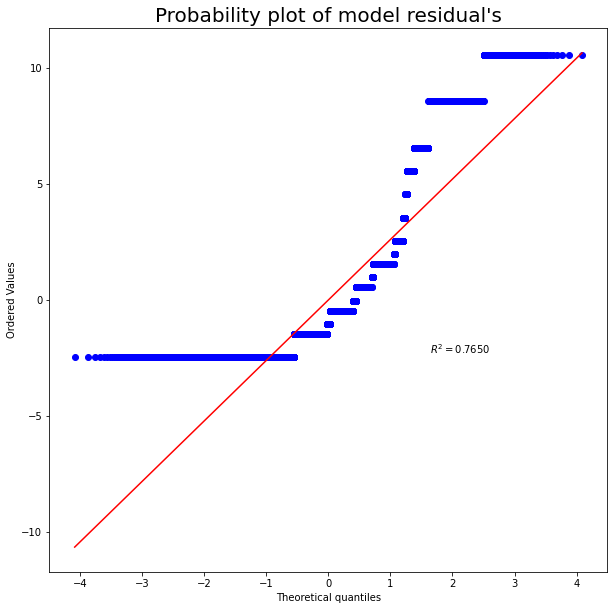

In [112]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [113]:
# Assumption check 2: Homogeneity of variance, does each group have equal variances
stats.levene(khan_data['returned_user'][khan_data['lang_filter'] == 'eng'],
             khan_data['returned_user'][khan_data['lang_filter'] == 'other'])



LeveneResult(statistic=440.7942888264609, pvalue=3.377216582910751e-97)

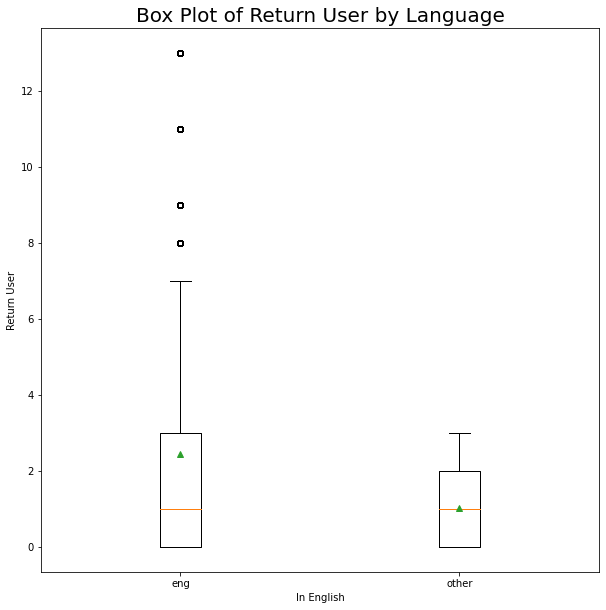

In [114]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Return User by Language", fontsize= 20)
ax.set

data = [khan_data['returned_user'][khan_data['lang_filter'] == 'eng'],
             khan_data['returned_user'][khan_data['lang_filter'] == 'other']]

ax.boxplot(data,
           labels= ['eng', 'other'],
           showmeans= True)

plt.xlabel("In English")
plt.ylabel("Return User")

plt.show()

In [133]:
# Redeo analysis with n=2000, randomly selected 2000 rows in new data frame (df)
df = pd.DataFrame(khan_data, columns=['user_id',
                                      'returned_user',
                                      'returner','lang_filter',
                                      'lang_encode', 
                                      'country_filter',
                                      'country_encode', 
                                      'user_registered_flag',
                                      'registered_user'])

In [138]:
df = df.sample(n=2000)

In [140]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 4229 to 23699
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_id               2000 non-null   int64 
 1   returned_user         2000 non-null   int64 
 2   returner              2000 non-null   object
 3   lang_filter           2000 non-null   object
 4   lang_encode           2000 non-null   int64 
 5   country_filter        2000 non-null   object
 6   country_encode        2000 non-null   int64 
 7   user_registered_flag  2000 non-null   bool  
 8   registered_user       2000 non-null   int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 142.6+ KB


,user_id,returned_user,returner,lang_filter,lang_encode,country_filter,country_encode,user_registered_flag,registered_user
4229,1305618049999078001,2,Yes,eng,1,other,0,True,1
2592,780040238317029001,4,Yes,eng,1,USA,1,True,1
29444,8707542974417399001,0,No,eng,1,USA,1,True,1
11490,3423849276838252001,2,Yes,eng,1,other,0,True,1
6721,1986362364688284001,1,Yes,eng,1,USA,1,False,0


In [141]:
stats.f_oneway(df['returned_user'][df['lang_filter'] == 'eng'],
               df['returned_user'][df['lang_filter'] == 'other'])

F_onewayResult(statistic=23.722386304291266, pvalue=1.2002800035487185e-06)

In [144]:
model3 = ols('returned_user ~ C(lang_filter)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(country_filter),8805.864584,1.0,1013.94742,5.024738e-219
Residual,273386.771038,31479.0,NaN,NaN


In [145]:
stats.shapiro(model3.resid)

ShapiroResult(statistic=0.7639626860618591, pvalue=0.0)

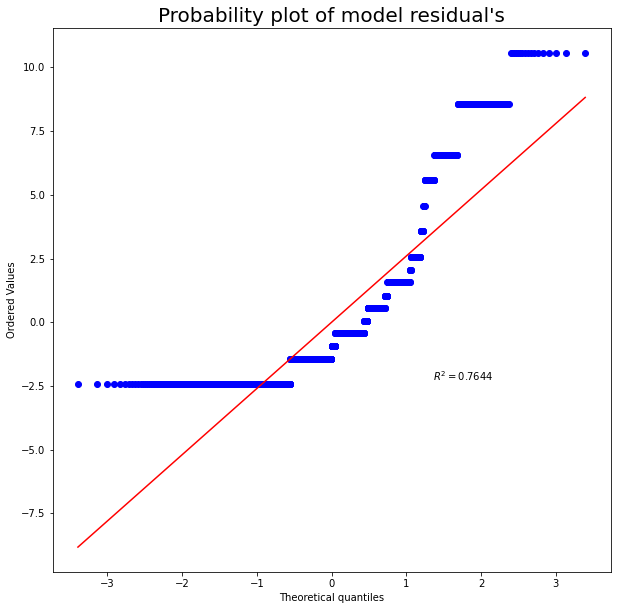

In [146]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model3.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

### ANOVA Country orgin

In [101]:
# Make 2 new columns that has 2 variables from country: US & other , (1,0)

khan_data['country_filter'] = np.where(khan_data['country'] == 'US', 'USA', 'other')
khan_data['country_encode'] = np.where(khan_data['country'].str.contains('US'),1,0)

khan_data.head(5)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,returned_user,returner,lang_filter,lang_encode,country_filter,country_encode
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,1,Yes,eng,1,USA,1
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,1,Yes,eng,1,USA,1
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,1,Yes,eng,1,USA,1
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,1,Yes,eng,1,USA,1
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,1,Yes,eng,1,USA,1


In [116]:
# ANOVA using SCIPY.STATS
stats.f_oneway(khan_data['returned_user'][khan_data['country_filter'] == 'USA'],
               khan_data['returned_user'][khan_data['country_filter'] == 'other'])

F_onewayResult(statistic=1013.9474202716715, pvalue=5.0247384120845334e-219)

In [147]:
stats.f_oneway(df['returned_user'][df['country_filter'] == 'USA'],
               df['returned_user'][df['country_filter'] == 'other'])

F_onewayResult(statistic=20.7875493511381, pvalue=5.44223698641368e-06)

In [119]:
# ANOVA using STATSMODEL
model1 = ols('returned_user ~ C(country_filter)', data=khan_data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(country_filter),8805.864584,1.0,1013.94742,5.024738e-219
Residual,273386.771038,31479.0,NaN,NaN


In [120]:
# Assumption check of normality 
stats.shapiro(model1.resid)

/Users/nicholasmai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7949135303497314, pvalue=0.0)

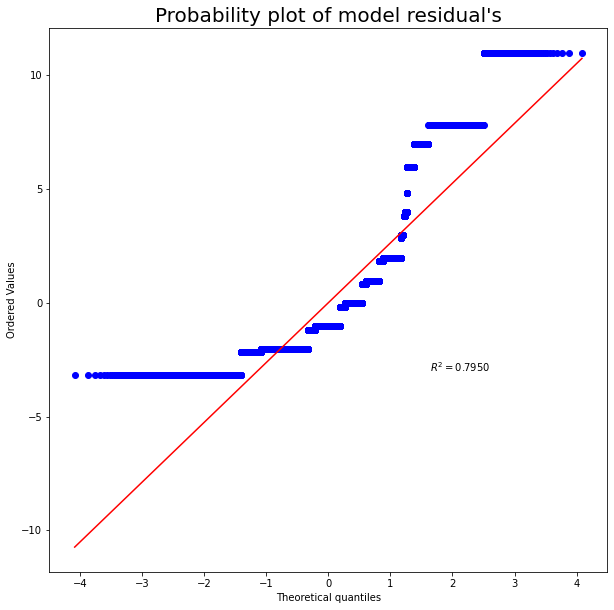

In [121]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model1.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [122]:
# Assumption check 2: Homogeneity of variance, does each group have equal variances
stats.levene(khan_data['returned_user'][khan_data['country_filter'] == 'USA'],
             khan_data['returned_user'][khan_data['country_filter'] == 'other'])

LeveneResult(statistic=1027.5531054884093, pvalue=6.865486601091774e-222)

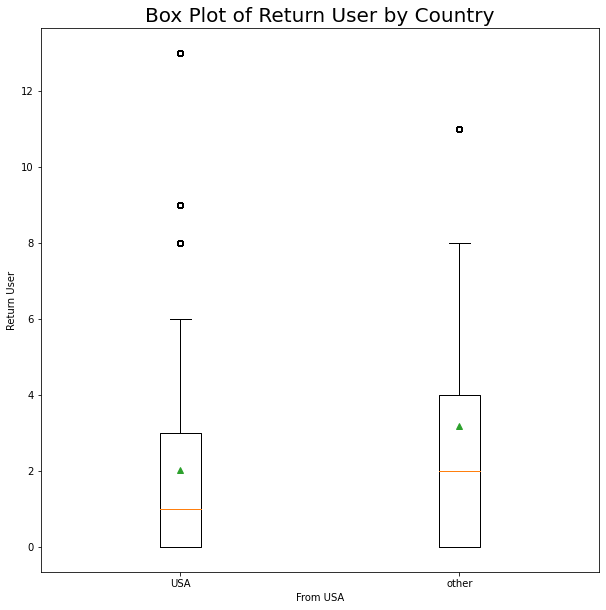

In [123]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Return User by Country", fontsize= 20)
ax.set

data = [khan_data['returned_user'][khan_data['country_filter'] == 'USA'],
             khan_data['returned_user'][khan_data['country_filter'] == 'other']]

ax.boxplot(data,
           labels= ['USA', 'other'],
           showmeans= True)

plt.xlabel("From USA")
plt.ylabel("Return User")

plt.show()

### ANOVA Registered KA User

In [104]:
# Make 1 encoded column for registered KA user: (1,0)

khan_data['registered_user'] = np.where(khan_data['user_registered_flag'] == True, 1, 0)

khan_data.head(5)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,returned_user,returner,lang_filter,lang_encode,country_filter,country_encode,registered_user
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,1,Yes,eng,1,USA,1,1
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,1,Yes,eng,1,USA,1,1
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,1,Yes,eng,1,USA,1,1
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,1,Yes,eng,1,USA,1,1
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,1,Yes,eng,1,USA,1,1


In [124]:
# ANOVA using SCIPY.STATS
stats.f_oneway(khan_data['returned_user'][khan_data['user_registered_flag'] == True],
               khan_data['returned_user'][khan_data['user_registered_flag'] == False])

F_onewayResult(statistic=1648.8340570229059, pvalue=0.0)

In [148]:
stats.f_oneway(df['returned_user'][df['user_registered_flag'] == True],
               df['returned_user'][df['user_registered_flag'] == False])

F_onewayResult(statistic=101.20452654628959, pvalue=2.937773261734725e-23)

In [126]:
# ANOVA using STATSMODEL
model2 = ols('returned_user ~ user_registered_flag', data=khan_data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(country_filter),8805.864584,1.0,1013.94742,5.024738e-219
Residual,273386.771038,31479.0,NaN,NaN


In [127]:
# Assumption check of normality 
stats.shapiro(model2.resid)

/Users/nicholasmai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7807454466819763, pvalue=0.0)

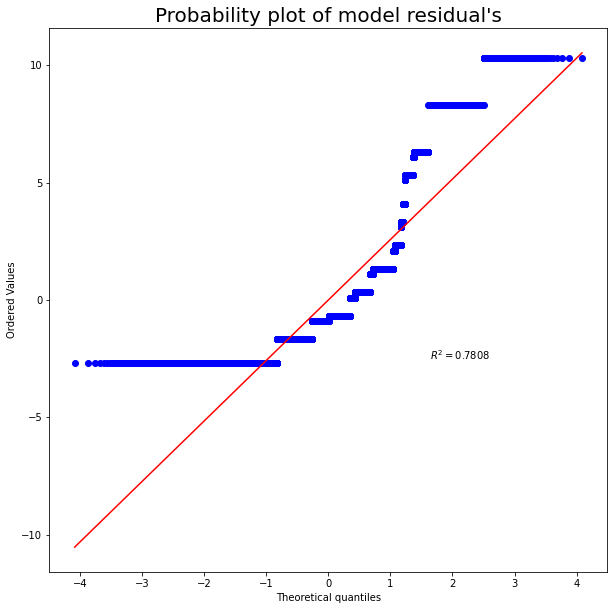

In [128]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [130]:
# Assumption check 2: Homogeneity of variance, does each group have equal variances
stats.levene(khan_data['returned_user'][khan_data['user_registered_flag'] == True],
             khan_data['returned_user'][khan_data['user_registered_flag'] == False])

LeveneResult(statistic=1300.796950571617, pvalue=3.706519834209885e-279)

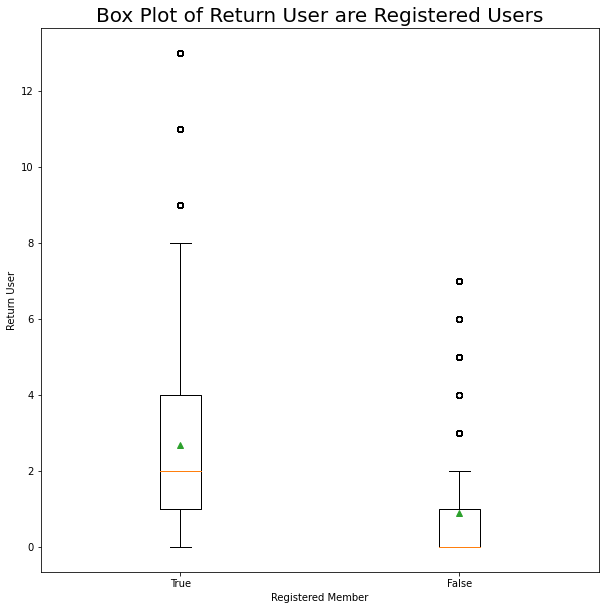

In [131]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Return User are Registered Users", fontsize= 20)
ax.set

data = [khan_data['returned_user'][khan_data['user_registered_flag'] == True],
             khan_data['returned_user'][khan_data['user_registered_flag'] == False]]

ax.boxplot(data,
           labels= ['True', 'False'],
           showmeans= True)

plt.xlabel("Registered Member")
plt.ylabel("Return User")

plt.show()

## MANOVA attempt


In [152]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('country_filter + lang_filter ~ returned_user', data=khan_data)
print(fit.mv_test())

                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept               Value        Num DF   Den DF           F Value         Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda             -0.0000 3.0000 31477.0000 -15087250475823722.0000 1.0000
         Pillai's trace              1.0000 3.0000 31477.0000 -15087250475823722.0000 1.0000
 Hotelling-Lawley trace -1437930915508.8213 3.0000 31477.0000 -15087250475823720.0000 1.0000
    Roy's greatest root -1437930915508.8213 3.0000 31477.0000 -15087250475823724.0000 1.0000
--------------------------------------------------------------------------------------------
                                                                                            
-----------

In [153]:
fit1 = MANOVA.from_formula('country_filter + lang_filter + user_registered_flag ~ returned_user', data=khan_data)
print(fit1.mv_test())

                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept               Value        Num DF   Den DF           F Value         Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda             -0.0000 4.0000 31476.0000 -11315078374138914.0000 1.0000
         Pillai's trace              1.0000 4.0000 31476.0000 -11315078374138914.0000 1.0000
 Hotelling-Lawley trace -1437930915508.8213 4.0000 31476.0000 -11315078374138916.0000 1.0000
    Roy's greatest root -1437930915508.8213 4.0000 31476.0000 -11315078374138914.0000 1.0000
--------------------------------------------------------------------------------------------
                                                                                            
-----------

In [160]:
khan_data['country'].value_counts()

US    21973
CA     1842
IE     1049
GB      649
BR      617
      ...  
CI        2
GR        2
AM        1
MA        1
DO        1
Name: country, Length: 77, dtype: int64

### ANOVA attempt with 3 unique categorical values cause apparently ANOVA requires 3 values per dependent variable


In [163]:
# Make 2 new column that has 2 variables from language: engl & other, (1,0)

khan_data['lang_3'] = np.where(khan_data['language'] == "en", 'eng', np.where(
                                    khan_data['language'] == "es", 'spanish','other'))

khan_data.head(5)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,returned_user,returner,lang_filter,lang_encode,country_filter,country_encode,registered_user,lang_3,country_3
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,1,Yes,eng,1,USA,1,1,eng,other
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,1,Yes,eng,1,USA,1,1,eng,other
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,1,Yes,eng,1,USA,1,1,eng,other
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,1,Yes,eng,1,USA,1,1,eng,other
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,1,Yes,eng,1,USA,1,1,eng,other


In [159]:
stats.f_oneway(khan_data['returned_user'][khan_data['lang_3'] == 'eng'],
               khan_data['returned_user'][khan_data['lang_3'] == 'spanish'],
               khan_data['returned_user'][khan_data['lang_3'] == 'other'])

# previous result with 2 unique values (eng, other):
# F_onewayResult(statistic=389.0381747421554, pvalue=4.443156154653244e-86)

F_onewayResult(statistic=194.5131044021443, pvalue=1.100971335214026e-84)

In [165]:
khan_data['country_3'] = np.where(khan_data['country'] == "US", 'us', np.where(
                                    khan_data['country'] == "CA", 'ca','other'))

khan_data.head(5)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,returned_user,returner,lang_filter,lang_encode,country_filter,country_encode,registered_user,lang_3,country_3
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,1,Yes,eng,1,USA,1,1,eng,us
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,1,Yes,eng,1,USA,1,1,eng,us
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,1,Yes,eng,1,USA,1,1,eng,us
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,1,Yes,eng,1,USA,1,1,eng,us
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,1,Yes,eng,1,USA,1,1,eng,us


In [166]:
stats.f_oneway(khan_data['returned_user'][khan_data['country_3'] == 'us'],
               khan_data['returned_user'][khan_data['country_3'] == 'ca'],
               khan_data['returned_user'][khan_data['country_3'] == 'other'])

# previous result with 2 unique values (USA, other):
# F_onewayResult(statistic=1013.9474202716715, pvalue=5.0247384120845334e-219)

F_onewayResult(statistic=938.598110706762, pvalue=0.0)